iterations: 470
Gradient Descent
cost function: [21.07756837]
alpha 0.004


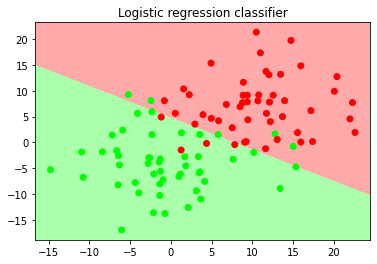

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets 
import time
start = time.time()

# the logistic function
def logistic_func(theta, x):
    t = x.dot(theta)
    g = np.zeros(t.shape)
    # split into positive and negative to improve stability
    g[t>=0.0] = 1.0 / (1.0 + np.exp(-t[t>=0.0])) 
    g[t<0.0] = np.exp(t[t<0.0]) / (np.exp(t[t<0.0])+1.0)
    return g

# function to compute log-likelihood
def neg_log_like(theta, x, y):
    g = logistic_func(theta,x)
    return -sum(np.log(g[y>0.5])) - sum(np.log(1-g[y<0.5]))

# function to compute the gradient of the negative log-likelihood
def log_grad(theta, x, y):
    g = logistic_func(theta,x)
    return -x.T.dot(y-g)

# def compute_cost(X, y, theta):
#     m = len(y) # no of obs
#     h = sigmoid(X.dot(theta)) # h = g(z) where z = theta.X 
#     epsilon = 1e-5 # for computing non-zero log
#     cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon))) # cost function to minimize
#     return cost
    
# implementation of gradient descent for logistic regression
def grad_desc(theta, x, y, alpha, tol, maxiter):
    '''
    Input: 
      - theta: A vector containing the parameters of your model.
      - x: A matrix containing the input data.
      - y: A vector containing the labels.
      - alpha: Step size.
      - tol: The stopping criterion for learning. You should stop when the l-2 
      norm of the gradient of log-likelihood with current parameters is smaller 
      than tol.
      - maxiter: The maximum iters your algorithm may perform. 
    
    Output:
      - theta: The estimated theta returned by logistic regression. It should 
               have the same shape as the input theta.
      - cost: An vector containing all the negative log-likelihood during each 
              iteration when updating your model.
    '''
    nll_vec = [] # Create a list nll_vec to store the negative log-likelihood
    nll_vec.append(neg_log_like(theta, x, y)) # Append the first negative log-likelihood
    #########################################
    # TODO: Implement the logistic regression
    
    m = len(y)
    cost_history = np.zeros((maxiter,1)) # simultaneous updation

    for i in range(maxiter):
        theta = theta - (alpha)* log_grad(theta,x,y)
        nll_vec.append(neg_log_like(theta, x, y))
        cost_history[i] = neg_log_like(theta,x,y) #compute_cost(x, y, theta)
        if (np.linalg.norm(log_grad(theta,x,y)) < tol):
            print("iterations:", i)
            break
    
    print("Gradient Descent")
    print("cost function:", cost_history[i])
    print("alpha", alpha)
    

    #########################################
    cost = np.array(nll_vec) # Convert the list to a Numpy array
    return theta, cost  
    
# function to compute output of LR classifier
def lr_predict(theta,x):
    # form Xtilde for prediction
    shape = x.shape
    Xtilde = np.zeros((shape[0],shape[1]+1))
    Xtilde[:,0] = np.ones(shape[0])
    Xtilde[:,1:] = x
    return logistic_func(theta,Xtilde)

def log_hessian(theta,x):
    g = logistic_func(theta,x)
    h = -((x.T*g*(1-g)).dot(x))
    return h

def newton_method(theta, x, y, tol, maxiter):
    '''
    Input: 
      - theta: A vector containing the parameters of your model.
      - x: A matrix containing the input data.
      - y: A vector containing the labels.
      - tol: The stopping criterion for learning. You should stop when the l-2 
      norm of the gradient of log-likelihood with current parameters is smaller 
      than tol.
      - maxiter: The maximum iters your algorithm may perform. 
    
    Output:
      - theta: The estimated theta returned by Newton's method. It should have
               the same shape as the input theta.
      - cost: An vector containing all the negative log-likelihood during each 
              iteration when updating your model.
    '''
    nll_vec = [] # Create a list nll_vec to store the negative log-likelihood
    nll_vec.append(neg_log_like(theta, x, y)) # Append the first negative log-likelihood
    #########################################
    # TODO: Implement the Newton's method
    
    m = len(y)
    cost_history = np.zeros((maxiter,1)) # for simultaneous updation

    for i in range(maxiter):
        b = log_grad(theta,x,y)
        hessian = log_hessian(theta,x) 
        theta = theta + (np.linalg.inv(hessian)).dot(b)
        nll_vec.append(neg_log_like(theta, x, y))
        cost_history[i] = neg_log_like(theta,x,y) #compute_cost(x, y, theta)
        if (np.linalg.norm(b) < tol):
            break
    
    print("Newtons Method")
    print("iterations:", i)
    print("cost function:", cost_history[i])
            
    #########################################
    cost = np.array(nll_vec) # Convert the list to a Numpy array
    return theta, cost  

def main():
    ## Generate dataset    
    np.random.seed(2020) # Set random seed so results are repeatable
    x,y = datasets.make_blobs(n_samples=100,n_features=2,centers=2,cluster_std=6.0)

    ## build classifier
    # form Xtilde
    shape = x.shape
    xtilde = np.zeros((shape[0],shape[1]+1))
    xtilde[:,0] = np.ones(shape[0])
    xtilde[:,1:] = x

    # Initialize theta to zero
    theta = np.zeros(shape[1]+1)

    # Run gradient descent
    #######################
    # Optimization Params #
    #######################
    alpha = 0.004 # TODO: Choose different alpha and observe the results// Learning Rate
    tol = 5e-2
    maxiter = 10000
    
    
    
    
    
    theta,cost = grad_desc(theta,xtilde,y,alpha,tol,maxiter) # Q(a)
    #theta,cost = newton_method(theta,xtilde,y,tol,maxiter) # Q(b)

    
    
    
    ## Plot the decision boundary. 
    # Begin by creating the mesh [x_min, x_max]x[y_min, y_max].
    h = .02  # step size in the mesh
    x_delta = (x[:, 0].max() - x[:, 0].min())*0.05 # add 5% white space to border
    y_delta = (x[:, 1].max() - x[:, 1].min())*0.05
    x_min, x_max = x[:, 0].min() - x_delta, x[:, 0].max() + x_delta
    y_min, y_max = x[:, 1].min() - y_delta, x[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = lr_predict(theta,np.c_[xx.ravel(), yy.ravel()])

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    ## Plot the training points
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold)

    ## Show the plot
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Logistic regression classifier")
    plt.show()
    
    
    #print(time.time() - start)


if __name__ == "__main__":
    main()